# Ch4 Moving Average (MA) and ARMA Models

## Simulate MA(1) Time Series

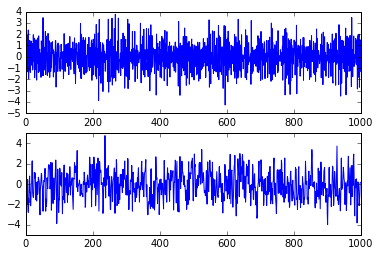

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()


## Compute the ACF for Several MA Time Series

In [ ]:

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()


## Estimating an MA Model

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
# the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1)
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)


## Forecasting with MA Model

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()


In [ ]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index(['DATE'])


In [ ]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()
# Missing data is common with high frequency financial time series, so good job fixing that.


## Applying an MA Model

In [ ]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)
# Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.


## Equivalence of AR(1) and MA(infinity)

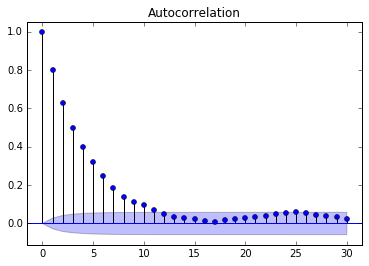

In [4]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()
# Notice that the ACF looks the same as an AR(1) with parameter 0.8
